In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import seaborn as sns
import pandas as pd
#sns.set(style="whitegrid")
%matplotlib inline
mpl.style.use('default')

url = 'http://www.mpe.mpg.de/~jcg/grbgen.html'
r = requests.get(url)
html_contents = r.text
html_soup = BeautifulSoup(html_contents)
dataFound=html_soup.find_all('td')

burstName = []
xRayPosition = []
redshift = []

i=0
burstNumber = 0
while(True):
    bn = dataFound[10+10*i].contents[0].text
    if(len(bn)<6):
        break
    zString = dataFound[19+10*i].contents[0]
    try:
        zFloat = float(zString)
        burstNumber += 1
        burstName.append(bn)
        position = dataFound[11+10*i].text
        xRayPosition.append(position)
        redshift.append(zFloat)
    except:
        pass
    i += 1
print('Number of bursts with a redshift = ',burstNumber)

Number of bursts with a redshift =  468


In [2]:
redshift

[0.0785,
 2.469,
 1.942,
 0.425,
 3.3765,
 1.859,
 1.505,
 2.938,
 1.39,
 1.096,
 0.117,
 0.654,
 0.6678,
 2.855,
 1.1175,
 1.305,
 1.0,
 1.998,
 2.248,
 1.409,
 2.409,
 0.0368,
 1.87,
 0.3285,
 0.0093,
 0.793,
 2.01,
 0.557,
 1.329,
 2.366,
 0.818,
 0.454,
 2.53,
 3.645,
 1.968,
 0.1475,
 0.645,
 1.549,
 1.159,
 2.708,
 2.013,
 2.823,
 0.16,
 0.736,
 3.332,
 1.406,
 0.483,
 0.367,
 1.17,
 0.555,
 1.717,
 0.726,
 1.64,
 2.38,
 3.52,
 0.972,
 1.96,
 0.87,
 2.59,
 1.167,
 1.423,
 4.063,
 0.81,
 2.33,
 1.968,
 1.359,
 0.755,
 0.282,
 0.313,
 0.256,
 0.807,
 1.394,
 3.139,
 2.06,
 0.593,
 1.758,
 1.5169,
 2.087,
 0.134,
 0.915,
 1.452,
 1.3195,
 1.47,
 2.993,
 2.33,
 0.573,
 1.21,
 0.351,
 3.29,
 1.32,
 0.558,
 3.14,
 2.275,
 1.92,
 2.04,
 4.233,
 0.384,
 4.707,
 6.32,
 0.725,
 1.027,
 0.889,
 1.6,
 4.7,
 3.26,
 3.956,
 1.02,
 4.954,
 5.283,
 1.416,
 1.98,
 1.2076,
 2.73,
 3.0,
 0.642,
 4.042,
 2.4,
 1.686,
 0.599,
 1.295,
 1.874,
 0.717,
 0.347,
 1.238,
 0.4791,
 0.145,
 1.155,
 2.006,
 2

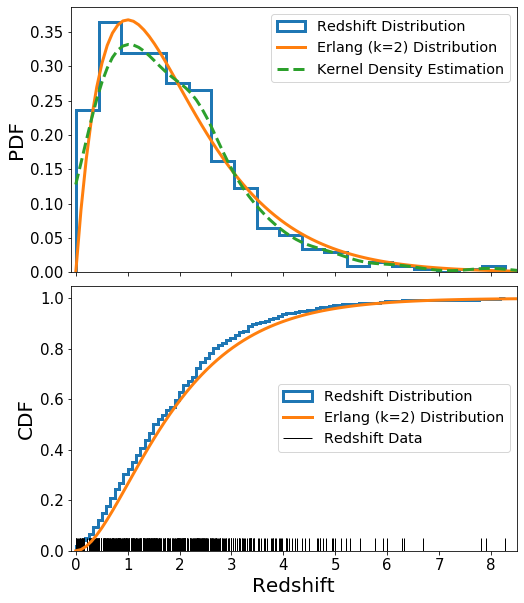

In [2]:
# https://stackoverflow.com/questions/39728723/vertical-line-at-the-end-of-a-cdf-histogram-using-matplotlib
def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])


fig, axes = plt.subplots(2, 1, figsize=(8, 10),
                         sharex=True, gridspec_kw={'hspace': 0.05})

axes[0].hist(redshift, density=True,histtype='step',linewidth=3.0,
            bins=19, label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).pdf(x)
axes[0].plot(x, Y, linestyle="-", linewidth=3.0,
             #color="navy",
             label="Erlang (k=2) Distribution")
kde = stats.kde.gaussian_kde(redshift)
axes[0].plot(x, kde(x), linestyle="--",
             linewidth=3.0, label="Kernel Density Estimation")
axes[0].set_xlim([-0.1,8.5])
axes[0].tick_params(labelsize=15)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend([handles[2],handles[0],handles[1]],
               [labels[2],labels[0],labels[1]],fontsize='x-large')
axes[0].set_ylabel('PDF',fontsize=20)


axes[1].hist(redshift, cumulative=True,histtype='step',linewidth=3.0,
             rwidth=5.0, density=True, bins=100,
            label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).cdf(x)
axes[1].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Erlang (k=2) Distribution")

sns.distplot(redshift,kde=False,hist=False,rug=True,ax=axes[1],rug_kws=dict(label='Redshift Data'),color='black')
axes[1].tick_params(labelsize=15)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend([handles[1],handles[0],handles[2]],
              [labels[1],labels[0],labels[2]],fontsize='x-large',loc="right")

#fig.text(-0.03, 0.7, 'PDF', ha='center',
#            va='center',rotation='vertical',fontsize=20)
#fig.text(-0.03, 0.3, 'CDF', ha='center',
#            va='center',rotation='vertical',fontsize=20)
#fig.text(0.5, 0.07, "$z$", ha='center',va='center',fontsize=20)
axes[1].set_ylabel('CDF',fontsize=20)
axes[1].set_xlabel('Redshift',fontsize=20)
fix_hist_step_vertical_line_at_end(axes[1])
#plt.xlabel('redshift $z$',fontsize=20)
#plt.savefig('./redshift.eps')
#plt.close()

(0, 8.5)

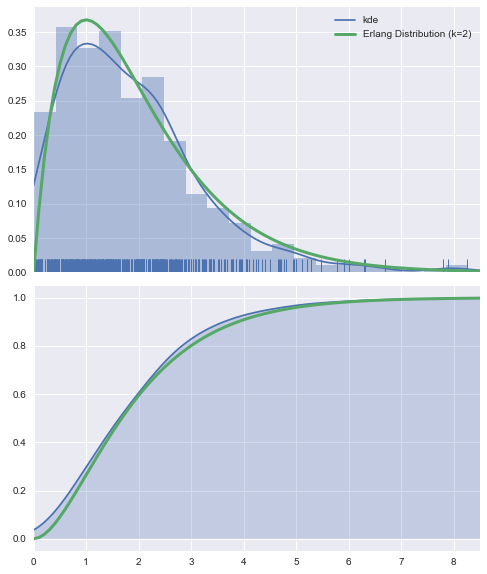

In [18]:
# another way of doing it, not useful right now ...
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import seaborn as sns
%matplotlib inline
mpl.style.use('seaborn')


fig, axes = plt.subplots(2, 1, figsize=(8, 10),
                         sharex=True, gridspec_kw={'hspace': 0.05})

sns.distplot(redshift,rug=True,ax=axes[0],kde_kws=dict(label='kde'))
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).pdf(x)
axes[0].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Erlang Distribution (k=2)")
axes[0].set_xlim([0,8.5])
axes[0].legend()

sns.kdeplot(redshift,shade=True,legend=True,cumulative=True,ax=axes[1])
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).cdf(x)
axes[1].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Erlang Distribution (k=2)")
axes[1].set_xlim([0,8.5])

In [4]:
np.mean(redshift)

1.8621150641025643

In [7]:
np.std(redshift)

1.340702347043578

In [52]:
stats.kstest(redshift,stats.erlang(2).cdf)

KstestResult(statistic=0.04821749787181451, pvalue=0.21975633254108903)

In [32]:
stats.ks_2samp(redshift,stats.erlang(2).rvs(size=1000))

Ks_2sampResult(statistic=0.04721367521367521, pvalue=0.4585009248684714)

In [37]:
loc, scale = stats.norm.fit(redshift)
print(loc,scale)
stats.ks_2samp(redshift,stats.norm.rvs(loc,scale,size=1000))

1.8621150641025643 1.340702347043578


Ks_2sampResult(statistic=0.09050427350427351, pvalue=0.009963017344098879)

In [68]:
stats.kstest(redshift,stats.norm(loc,scale).cdf)

KstestResult(statistic=0.0892962113550001, pvalue=0.0010703920316594351)

# compare with normal

(0, 8.5)

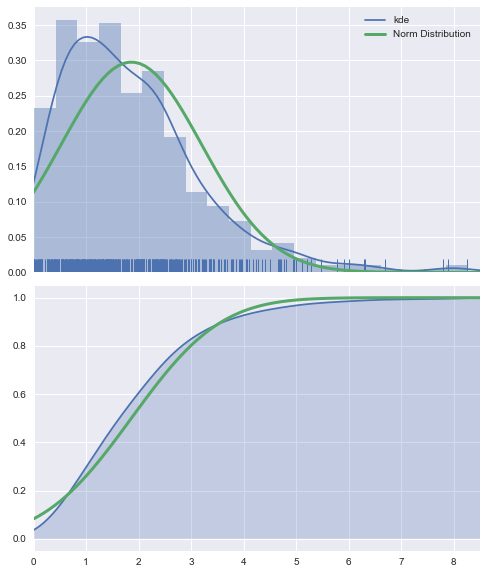

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import seaborn as sns
%matplotlib inline
mpl.style.use('seaborn')


fig, axes = plt.subplots(2, 1, figsize=(8, 10),
                         sharex=True, gridspec_kw={'hspace': 0.05})

sns.distplot(redshift,rug=True,ax=axes[0],kde_kws=dict(label='kde'))
x = np.linspace(0.0,10.0,100)
Y = stats.norm(loc,scale).pdf(x)
axes[0].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Norm Distribution")
axes[0].set_xlim([0,8.5])
axes[0].legend()

sns.kdeplot(redshift,shade=True,legend=True,cumulative=True,ax=axes[1])
x = np.linspace(0.0,10.0,100)
Y = stats.norm(loc,scale).cdf(x)
axes[1].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Norm Distribution")
axes[1].set_xlim([0,8.5])

In [46]:
stats.kstest(redshift,stats.erlang(2).cdf,mode='asymp',alternative = 'less')

KstestResult(statistic=0.00353160220330917, pvalue=0.9860920419177844)

In [9]:
stats.kstest(redshift,stats.erlang(2).cdf,mode='asymp',alternative = 'greater')

KstestResult(statistic=0.04821749787181451, pvalue=0.10987816627054452)

In [146]:
pValues = []
for diff in np.arange(0.0,1.0,0.01):
    pValue = stats.kstest(np.array(redshift)+diff,stats.erlang(2).cdf,mode='asymp')[1]
    pValues.extend([pValue])

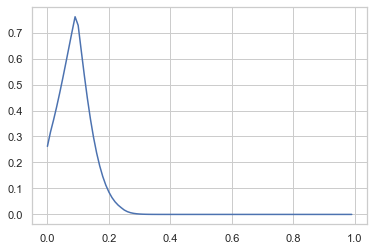

In [148]:
plt.plot(np.arange(0.0,1.0,0.01),pValues)

# Redshift data are under-determined by ~0.1?

In [35]:
stats.kstest(stats.erlang(2).rvs(100),stats.erlang(2).cdf,N=100)

KstestResult(statistic=0.062375020732980124, pvalue=0.831361610203864)

(array([ 961., 1014., 1034.,  965.,  875.,  925., 1052., 1009., 1044.,
        1121.]),
 array([5.29743706e-05, 1.00040702e-01, 2.00028429e-01, 3.00016156e-01,
        4.00003883e-01, 4.99991610e-01, 5.99979338e-01, 6.99967065e-01,
        7.99954792e-01, 8.99942519e-01, 9.99930246e-01]),
 <a list of 10 Patch objects>)

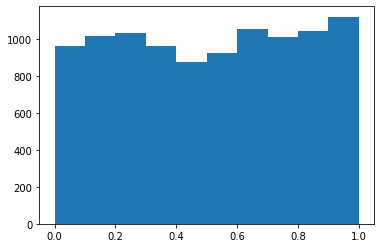

In [36]:
testNumber = 10000
pValues = np.zeros(testNumber)
for i in np.arange(testNumber):
    sample = stats.erlang(2).rvs(len(redshift))
    #plt.hist(sample,density=True)
    pValue = stats.kstest(sample,stats.erlang(2).cdf)[1]
    pValues[i] = pValue
    print(f"i={i}",end="\r")
    #x = np.linspace(0,10,100)
    #Y = stats.erlang(2).pdf(x)
    #plt.plot(x,Y)
plt.hist(pValues)

 0.9821002158655877


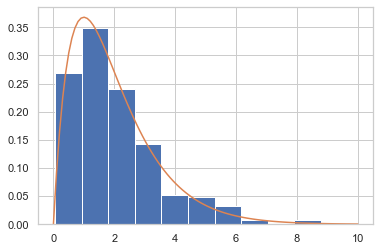

In [63]:
sample = stats.erlang(2).rvs(len(redshift))
plt.hist(sample,density=True)
pValue = stats.kstest(sample,stats.erlang(2).cdf)[1]
#pValues[i] = pValue
print("\r",pValue)
x = np.linspace(0,10,100)
Y = stats.erlang(2).pdf(x)
plt.plot(x,Y)

In [11]:
# https://stackoverflow.com/questions/39728723/vertical-line-at-the-end-of-a-cdf-histogram-using-matplotlib
def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])

# bootstrap

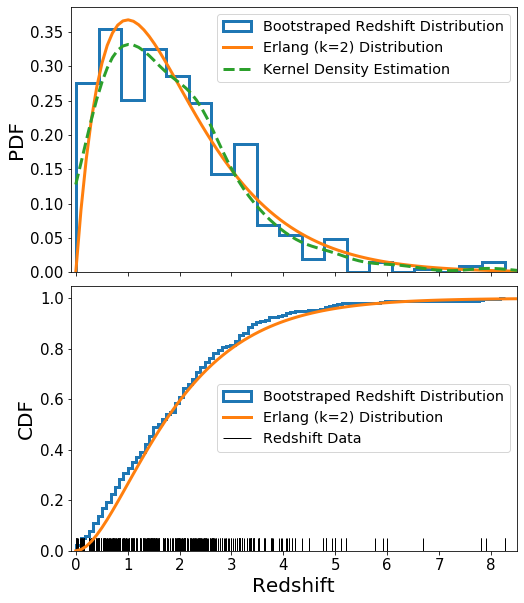

In [17]:
from astropy.stats import bootstrap, jackknife_resampling

redshift_boot = bootstrap(np.array(redshift),1)[0]

# https://stackoverflow.com/questions/39728723/vertical-line-at-the-end-of-a-cdf-histogram-using-matplotlib
def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])


fig, axes = plt.subplots(2, 1, figsize=(8, 10),
                         sharex=True, gridspec_kw={'hspace': 0.05})

axes[0].hist(redshift_boot, density=True,histtype='step',linewidth=3.0,
            bins=19, label="Bootstraped Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).pdf(x)
axes[0].plot(x, Y, linestyle="-", linewidth=3.0,
             #color="navy",
             label="Erlang (k=2) Distribution")
kde = stats.kde.gaussian_kde(redshift)
axes[0].plot(x, kde(x), linestyle="--",
             linewidth=3.0, label="Kernel Density Estimation")
axes[0].set_xlim([-0.1,8.5])
axes[0].tick_params(labelsize=15)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend([handles[2],handles[0],handles[1]],
               [labels[2],labels[0],labels[1]],fontsize='x-large')
axes[0].set_ylabel('PDF',fontsize=20)


axes[1].hist(redshift_boot, cumulative=True,histtype='step',linewidth=3.0,
             rwidth=5.0, density=True, bins=100,
            label="Bootstraped Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).cdf(x)
axes[1].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Erlang (k=2) Distribution")

sns.distplot(redshift_boot,kde=False,hist=False,rug=True,ax=axes[1],rug_kws=dict(label='Redshift Data'),color='black')
axes[1].tick_params(labelsize=15)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend([handles[1],handles[0],handles[2]],
              [labels[1],labels[0],labels[2]],fontsize='x-large',loc="right")

#fig.text(-0.03, 0.7, 'PDF', ha='center',
#            va='center',rotation='vertical',fontsize=20)
#fig.text(-0.03, 0.3, 'CDF', ha='center',
#            va='center',rotation='vertical',fontsize=20)
#fig.text(0.5, 0.07, "$z$", ha='center',va='center',fontsize=20)
axes[1].set_ylabel('CDF',fontsize=20)
axes[1].set_xlabel('Redshift',fontsize=20)
fix_hist_step_vertical_line_at_end(axes[1])
#plt.xlabel('redshift $z$',fontsize=20)
#plt.savefig('./redshift.eps')
#plt.close()

In [32]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time
from astropy.coordinates import get_sun, get_moon, SkyCoord
import astropy.units as u
import pandas as pd
import os

467 467


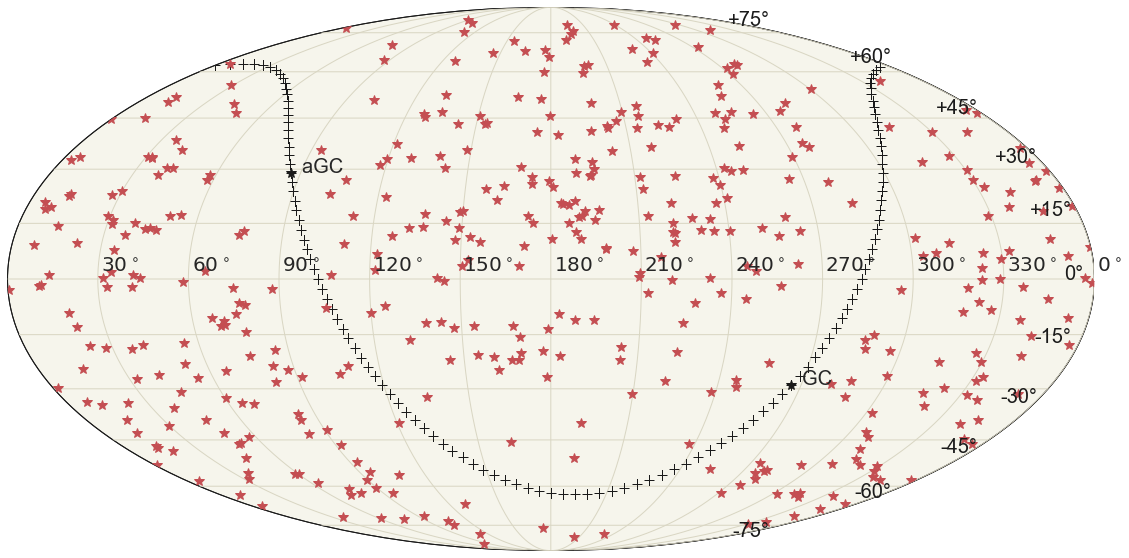

In [130]:
#################################
# Celestial Coordinate (ra,dec) #
#################################
projection = 'moll'
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
map = Basemap(projection=projection,lat_0=0,lon_0=180,
              resolution='l',area_thresh=1000.0,celestial=True,ax=ax)
map.drawmeridians(np.arange(0, 360, 30), dashes=[1,0],color='#d9d6c3')
map.drawparallels(np.arange(-90, 90, 15), dashes=[1,0],labels=[1,0,0,1],
                  color='#d9d6c3',size=20)
map.drawmapboundary(fill_color='#f6f5ec')
if projection == 'moll':
    az1 = np.arange(0, 360, 30)
    zen1 = np.zeros(az1.size) + 2
    azname = []
    for i in az1:
        azname.append(r'${\/%s\/^{\circ}}$' % str(i))
    x1, y1 = map(az1, zen1)
    for index, value in enumerate(az1):
        plt.text(x1[index], y1[index], azname[index], size=20)

galactic_center=SkyCoord("0h 0d", frame='galactic').transform_to('icrs')
x,y=map(galactic_center.ra.deg, galactic_center.dec.deg)
map.plot(x, y, '*', color='k', markersize=10)
plt.text(x, y, '  GC', fontsize=20)

anti_galactic_center=SkyCoord("12h 0d", frame='galactic').transform_to('icrs')
x,y=map(anti_galactic_center.ra.deg, anti_galactic_center.dec.deg)
map.plot(x, y, '*', color='k', markersize=10)
plt.text(x, y, '  aGC', fontsize=20)

for i in np.arange(0, 24, 0.2):
    galactic_plane=SkyCoord(str(i)+"h 0d", frame='galactic').transform_to('icrs')
    x,y=map(galactic_plane.ra.deg, galactic_plane.dec.deg)
    map.plot(x, y, '+', color='k', markersize=10)

catalog_x=[]
catalog_y=[]
pattern = r'(\d{2})h(\d{2})m(\d{2})s\s*\n\s*([+-]\d{2})\°\s*(\d{2}.?\d*)\''
#burstNumber
for i in range(burstNumber):
    text = xRayPosition[i]
    result = re.search(pattern, text)
    ra = "{}h{}m{}s".format(result.groups()[0],
                            result.groups()[1],result.groups()[2])
    if len(result.groups([2]))>2:
        dec = "{}d{}m{}s".format(result.groups()[3],
                             result.groups()[4][:2],str(int(result.groups()[4][-1])*6.0))
    else:
        dec = "{}d{}m{}s".format(result.groups()[3],
                             result.groups()[4],'00')
    mysource = SkyCoord(ra, dec, frame = 'icrs')
    x, y = map(mysource.ra.deg,mysource.dec.deg)
    catalog_x.extend([x])
    catalog_y.extend([y])
print(len(catalog_x),len(catalog_y))
map.plot(catalog_x, catalog_y, color='r',marker='*',markersize=10,ls='None')

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_usersjar():
    usersjar = "/home/lang/Software/HEASARC-Xamin/users.jar"
    return usersjar

def query_veroncat(cdir='./'):
    '''
    veroncat:Veron Catalog of Quasars & AGN, 13th Edition 
    https://heasarc.gsfc.nasa.gov/W3Browse/all/veroncat.html
    
    Redshift_Flag
    This flag is set to 'E' if the redshift was estimated by slitless spectroscopy, 
    and is set to '>' if the quoted redshift is a lower limit.

     Position_Flag
        This flag is related to the accuracy and source for the quoted position:

      O =  optical position with an accuracy better than 1 arcsecond
      R =  radio position with an accuracy better than 1 arcsecond
      A =  approximate position
  
  
  Object_Type
A code created by the catalog authors describing the classification of the object:

       S1:  Seyfert 1 spectrum
       S1h: broad polarized Balmer lines detected
       S1i: broad Paschen lines observed in the infrared
       S1n: narrow-line Seyfert 1
       S1.0, S1.2, S1.5, S1.8, S1.9: intermediate Seyfert galaxies
       S2:  Seyfert 2 spectrum
       S2?: probable Seyfert 2
       S3:  Seyfert 3 or liner
       S3b: Seyfert 3 or liner with broad Balmer lines
       S3h: Seyfert 3 or liner with broad polarized Balmer lines detected
       S :  unclassified Seyfert
       S?:  possibly a Seyfert
       H2:  nuclear HII region
       HP:  high optical polarization (>3%)
       BL:  confirmed BL Lac object
       BL?: probable BL Lac object
       ?:   questionable BL Lac object
       Q2: type-2 quasar
       
Default object_type values are set to the following for objects in tables qso.dat, bllac.dat and agn.dat, 
if none were explicitly given in the original tables:
      Table qso.dat    =  Q : quasar
      Table bllac.dat  =  B?: presumed BL Lac object
      Table agn.dat    =  AG: unspecified type of active galaxy
      
Broad_Type
The broad Veron object classification, a parameter created by the HEASARC which is based on the table 
in which it was listed in the original reference: objects in the qso.dat table have been assigned a value of 'QSO',
those in bllac.dat, 'BLLAC', and those in agn.dat, 'AGN'.

Class
The HEASARC Browse classification type. The classification value is based on the value of the object_type parameter.
    '''
    veroncat = cdir+'/veroncat.txt'
    if not os.path.exists(veroncat):
        usersjar = get_usersjar()
        assert os.path.exists(usersjar), """'users.jar' is not available! 
            download users.jar at:
            https://heasarc.gsfc.nasa.gov/xamin/distrib/users.jar
            and update the path of usersjar in 'personal_settings.py'."""
        java_ready = os.system("java --version")
        assert not java_ready, """java not properly installed!
            Install Oracle Java 10 (JDK 10) in Ubuntu or Linux Mint from PPA
            $ sudo add-apt-repository ppa:linuxuprising/java
            $ sudo apt update
            $ sudo apt install oracle-java10-installer"""
        fields = ("name,redshift_flag,redshift,"
                  "ra,dec,position_flag,"
                  "object_Type,class,broad_type")
        print('querying veroncat catalog using HEASARC-Xamin-users.jar ...')
        query_ready = os.system("java -jar "+usersjar+" table=veroncat fields="
                +fields+" sortvar=redshift output="+cdir+"/veroncat.txt")
        assert not query_ready, 'failed in querying veroncat catalog!'
        print('successful in querying veroncat catalog!')
    return veroncat

veroncat = query_veroncat()

In [12]:
df = pd.read_csv(veroncat,delimiter='|',header=0,skipfooter=3,engine='python')
name = df[df.columns[0]].apply(lambda x:x.strip()).values
redshift_flag = df[df.columns[1]].apply(lambda x:x.strip()).values
redshift_agn = df[df.columns[2]].apply(lambda x:x.strip()).values
ra_raw = df[df.columns[3]].apply(lambda x:x.strip()).values
dec_raw = df[df.columns[4]].apply(lambda x:x.strip()).values
position_flag = df[df.columns[5]].apply(lambda x:x.strip()).values
object_type = df[df.columns[6]].apply(lambda x:x.strip()).values
#class = df[df.columns[7]].apply(lambda x:x.strip()).values
broad_type = df[df.columns[8]].apply(lambda x:x.strip()).values
number = len(name)
print('source_number = ',number)

source_number =  168941


In [8]:
len(object_type)

168941

In [9]:
bad_data_seq = []
for i in range(number):
    if (position_flag[i]=='null' or redshift_flag[i]!='null' or redshift_agn[i]=='null'):
        bad_data_seq.extend([i])
print('bad_data_num = ', len(bad_data_seq))

name_good = np.delete(name,bad_data_seq)
ra_good = np.delete(ra_raw,bad_data_seq)
dec_good = np.delete(dec_raw,bad_data_seq)
redshift_agn_good = np.delete(redshift_agn,bad_data_seq).astype(np.float)
object_type_good = np.delete(object_type,bad_data_seq)
good_number = len(name_good)
print('good_source_number = ',good_number,number-len(bad_data_seq))

bad_data_num =  5590
good_source_number =  163351 163351


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


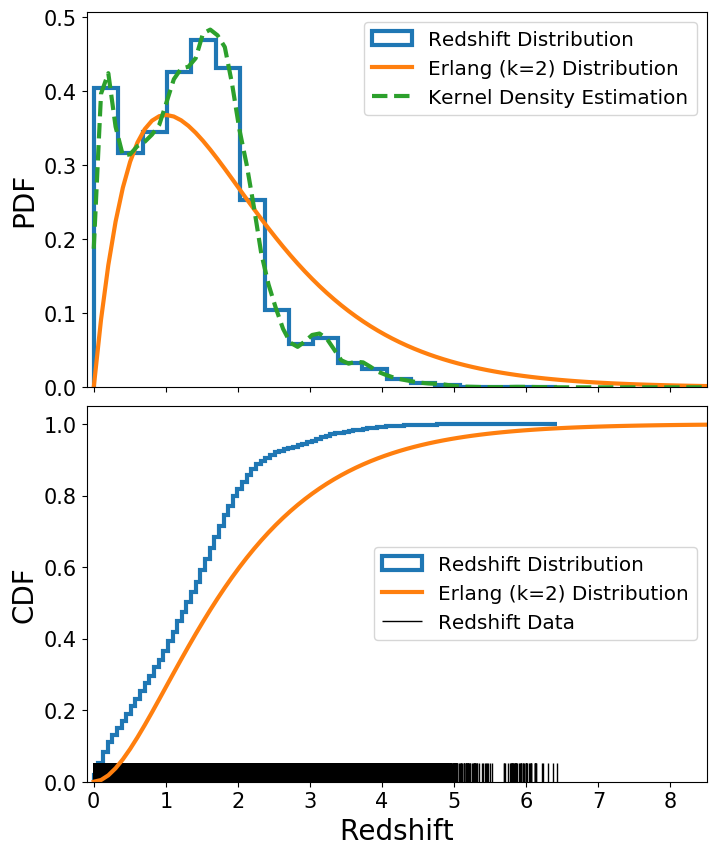

In [24]:
# https://stackoverflow.com/questions/39728723/vertical-line-at-the-end-of-a-cdf-histogram-using-matplotlib
def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])
        
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import seaborn as sns
#sns.set(style="whitegrid")
%matplotlib inline
mpl.style.use('default')


fig, axes = plt.subplots(2, 1, figsize=(8, 10),
                         sharex=True, gridspec_kw={'hspace': 0.05})

axes[0].hist(redshift_agn_good, density=True,histtype='step',linewidth=3.0,
            bins=19, label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).pdf(x)
axes[0].plot(x, Y, linestyle="-", linewidth=3.0,
             #color="navy",
             label="Erlang (k=2) Distribution")
kde = stats.kde.gaussian_kde(redshift_agn_good)
axes[0].plot(x, kde(x), linestyle="--",
             linewidth=3.0, label="Kernel Density Estimation")
axes[0].set_xlim([-0.1,8.5])
axes[0].tick_params(labelsize=15)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend([handles[2],handles[0],handles[1]],
               [labels[2],labels[0],labels[1]],fontsize='x-large')
axes[0].set_ylabel('PDF',fontsize=20)


axes[1].hist(redshift_agn_good, cumulative=True,histtype='step',linewidth=3.0,
             rwidth=5.0, density=True, bins=100,
            label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).cdf(x)
axes[1].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Erlang (k=2) Distribution")

sns.distplot(redshift_agn_good,kde=False,hist=False,rug=True,ax=axes[1],rug_kws=dict(label='Redshift Data'),color='black')
axes[1].tick_params(labelsize=15)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend([handles[1],handles[0],handles[2]],
              [labels[1],labels[0],labels[2]],fontsize='x-large',loc="right")

axes[1].set_ylabel('CDF',fontsize=20)
axes[1].set_xlabel('Redshift',fontsize=20)
fix_hist_step_vertical_line_at_end(axes[1])

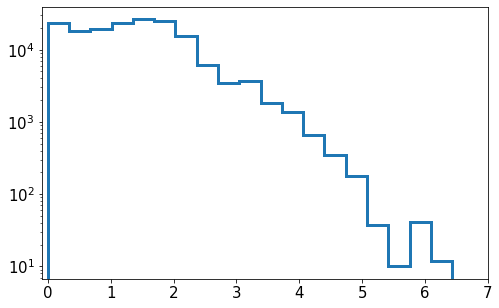

In [32]:
# Fig 4.12 of Active Galactic Nuclei by V. Beckmann & C. Shrader 2012


fig, axes = plt.subplots(1, 1, figsize=(8, 5),
                         sharex=True, gridspec_kw={'hspace': 0.05})

axes.hist(redshift_agn_good,histtype='step',linewidth=3.0,
            bins=19, label="Redshift Distribution")

axes.set_xlim([-0.1,7])
axes.set_yscale('log')
axes.tick_params(labelsize=15)


bad_data_num =  614
good_source_number =  168327 168327
710


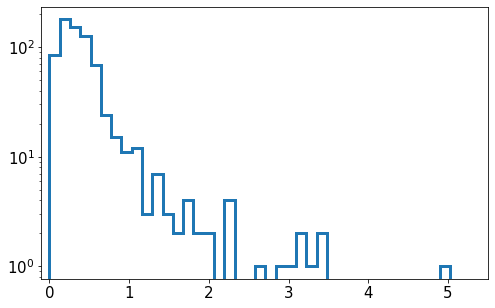

In [33]:
# Fig 4.14 of Active Galactic Nuclei by V. Beckmann & C. Shrader 2012


bad_data_seq = []
for i in range(number):
    if (redshift_agn[i]=='null'):
        bad_data_seq.extend([i])
print('bad_data_num = ', len(bad_data_seq))

name_good = np.delete(name,bad_data_seq)
ra_good = np.delete(ra_raw,bad_data_seq)
dec_good = np.delete(dec_raw,bad_data_seq)
redshift_agn_good = np.delete(redshift_agn,bad_data_seq).astype(np.float)
object_type_good = np.delete(object_type,bad_data_seq)
good_number = len(name_good)
print('good_source_number = ',good_number,number-len(bad_data_seq))
redshift_blazar = redshift_agn_good [(object_type_good=='BL') | (object_type_good=='BL?') | (object_type_good=='B?')]
print(len(redshift_blazar))

fig, axes = plt.subplots(1, 1, figsize=(8, 5),
                         sharex=True, gridspec_kw={'hspace': 0.05})

axes.hist(redshift_blazar,histtype='step',linewidth=3.0,
            bins=39, label="Redshift Distribution")

axes.set_xlim([-0.1,5.5])
axes.set_yscale('log')
axes.tick_params(labelsize=15)

# re-select sample for AGN

bad_data_num =  5590
good_source_number =  163351 163351
32746


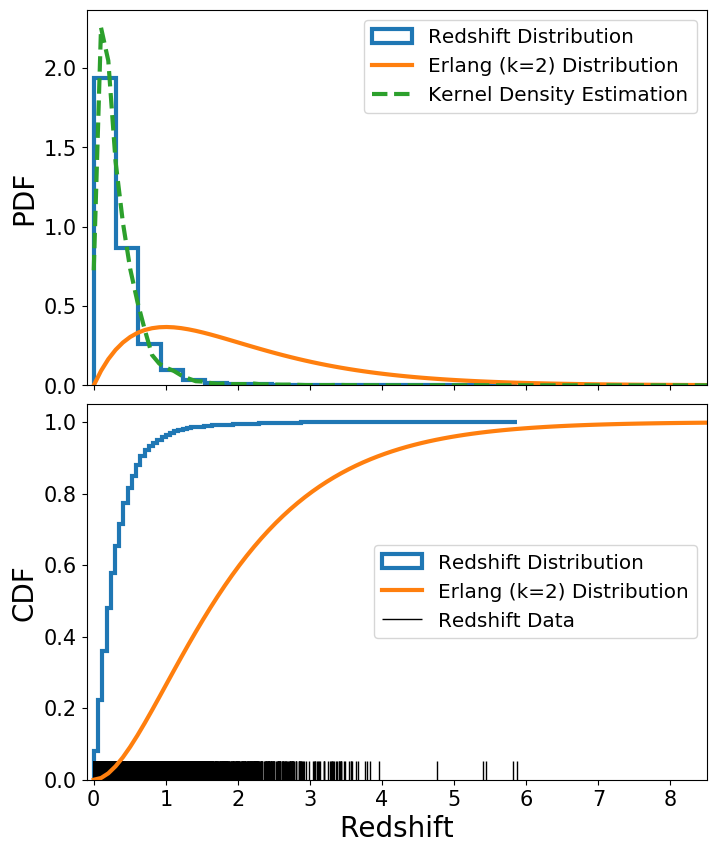

In [38]:
bad_data_seq = []
for i in range(number):
    if (position_flag[i]=='null' or redshift_flag[i]!='null' or redshift_agn[i]=='null'):
        bad_data_seq.extend([i])
print('bad_data_num = ', len(bad_data_seq))

name_good = np.delete(name,bad_data_seq)
ra_good = np.delete(ra_raw,bad_data_seq)
dec_good = np.delete(dec_raw,bad_data_seq)
redshift_agn_good = np.delete(redshift_agn,bad_data_seq).astype(np.float)
object_type_good = np.delete(object_type,bad_data_seq)
broad_type_good = np.delete(broad_type,bad_data_seq)
good_number = len(name_good)
print('good_source_number = ',good_number,number-len(bad_data_seq))
redshift_qso = redshift_agn_good[broad_type_good=='AGN']
print(len(redshift_qso))

redshift_agn_good = redshift_qso

# https://stackoverflow.com/questions/39728723/vertical-line-at-the-end-of-a-cdf-histogram-using-matplotlib
def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])
        
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import seaborn as sns
#sns.set(style="whitegrid")
%matplotlib inline
mpl.style.use('default')


fig, axes = plt.subplots(2, 1, figsize=(8, 10),
                         sharex=True, gridspec_kw={'hspace': 0.05})

axes[0].hist(redshift_agn_good, density=True,histtype='step',linewidth=3.0,
            bins=19, label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).pdf(x)
axes[0].plot(x, Y, linestyle="-", linewidth=3.0,
             #color="navy",
             label="Erlang (k=2) Distribution")
kde = stats.kde.gaussian_kde(redshift_agn_good)
axes[0].plot(x, kde(x), linestyle="--",
             linewidth=3.0, label="Kernel Density Estimation")
axes[0].set_xlim([-0.1,8.5])
axes[0].tick_params(labelsize=15)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend([handles[2],handles[0],handles[1]],
               [labels[2],labels[0],labels[1]],fontsize='x-large')
axes[0].set_ylabel('PDF',fontsize=20)


axes[1].hist(redshift_agn_good, cumulative=True,histtype='step',linewidth=3.0,
             rwidth=5.0, density=True, bins=100,
            label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).cdf(x)
axes[1].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Erlang (k=2) Distribution")

sns.distplot(redshift_agn_good,kde=False,hist=False,rug=True,ax=axes[1],rug_kws=dict(label='Redshift Data'),color='black')
axes[1].tick_params(labelsize=15)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend([handles[1],handles[0],handles[2]],
              [labels[1],labels[0],labels[2]],fontsize='x-large',loc="right")

axes[1].set_ylabel('CDF',fontsize=20)
axes[1].set_xlabel('Redshift',fontsize=20)
fix_hist_step_vertical_line_at_end(axes[1])

# re-select sample for QSO

bad_data_num =  5590
good_source_number =  163351 163351
129936


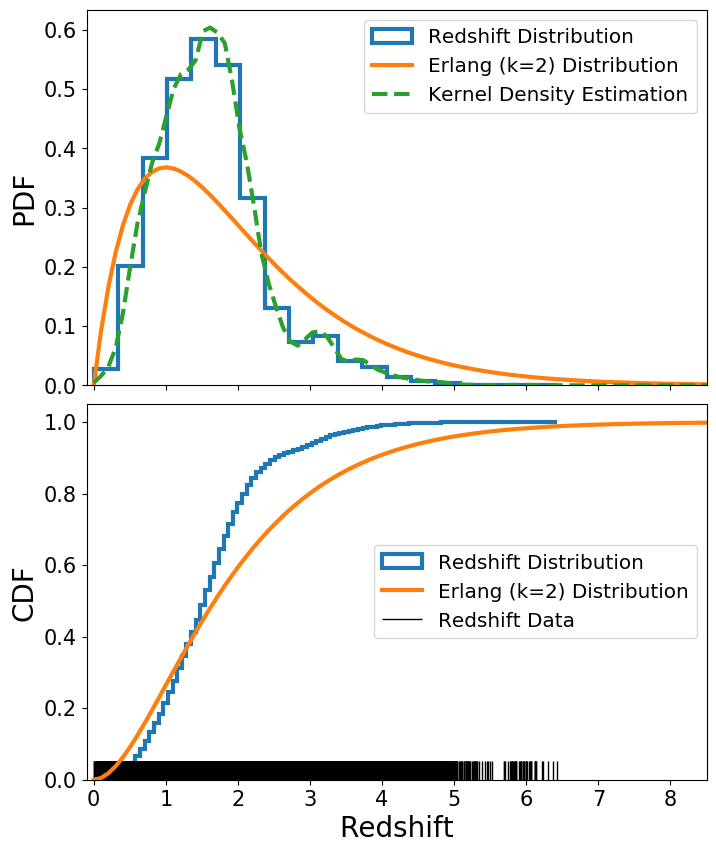

In [13]:
bad_data_seq = []
for i in range(number):
    if (position_flag[i]=='null' or redshift_flag[i]!='null' or redshift_agn[i]=='null'):
        bad_data_seq.extend([i])
print('bad_data_num = ', len(bad_data_seq))

name_good = np.delete(name,bad_data_seq)
ra_good = np.delete(ra_raw,bad_data_seq)
dec_good = np.delete(dec_raw,bad_data_seq)
redshift_agn_good = np.delete(redshift_agn,bad_data_seq).astype(np.float)
object_type_good = np.delete(object_type,bad_data_seq)
broad_type_good = np.delete(broad_type,bad_data_seq)
good_number = len(name_good)
print('good_source_number = ',good_number,number-len(bad_data_seq))
redshift_qso = redshift_agn_good[broad_type_good=='QSO']
print(len(redshift_qso))

redshift_agn_good = redshift_qso

# https://stackoverflow.com/questions/39728723/vertical-line-at-the-end-of-a-cdf-histogram-using-matplotlib
def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])
        
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import seaborn as sns
#sns.set(style="whitegrid")
%matplotlib inline
mpl.style.use('default')


fig, axes = plt.subplots(2, 1, figsize=(8, 10),
                         sharex=True, gridspec_kw={'hspace': 0.05})

axes[0].hist(redshift_agn_good, density=True,histtype='step',linewidth=3.0,
            bins=19, label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).pdf(x)
axes[0].plot(x, Y, linestyle="-", linewidth=3.0,
             #color="navy",
             label="Erlang (k=2) Distribution")
kde = stats.kde.gaussian_kde(redshift_agn_good)
axes[0].plot(x, kde(x), linestyle="--",
             linewidth=3.0, label="Kernel Density Estimation")
axes[0].set_xlim([-0.1,8.5])
axes[0].tick_params(labelsize=15)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend([handles[2],handles[0],handles[1]],
               [labels[2],labels[0],labels[1]],fontsize='x-large')
axes[0].set_ylabel('PDF',fontsize=20)


axes[1].hist(redshift_agn_good, cumulative=True,histtype='step',linewidth=3.0,
             rwidth=5.0, density=True, bins=100,
            label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).cdf(x)
axes[1].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Erlang (k=2) Distribution")

sns.distplot(redshift_agn_good,kde=False,hist=False,rug=True,ax=axes[1],rug_kws=dict(label='Redshift Data'),color='black')
axes[1].tick_params(labelsize=15)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend([handles[1],handles[0],handles[2]],
              [labels[1],labels[0],labels[2]],fontsize='x-large',loc="right")

axes[1].set_ylabel('CDF',fontsize=20)
axes[1].set_xlabel('Redshift',fontsize=20)
fix_hist_step_vertical_line_at_end(axes[1])

In [14]:
np.mean(redshift_agn_good)

1.6357929057382095

In [15]:
np.std(redshift_agn_good)

0.7669608948069845

# re-select sample for QSO ('Q')

bad_data_num =  5590
good_source_number =  163351 163351
126537


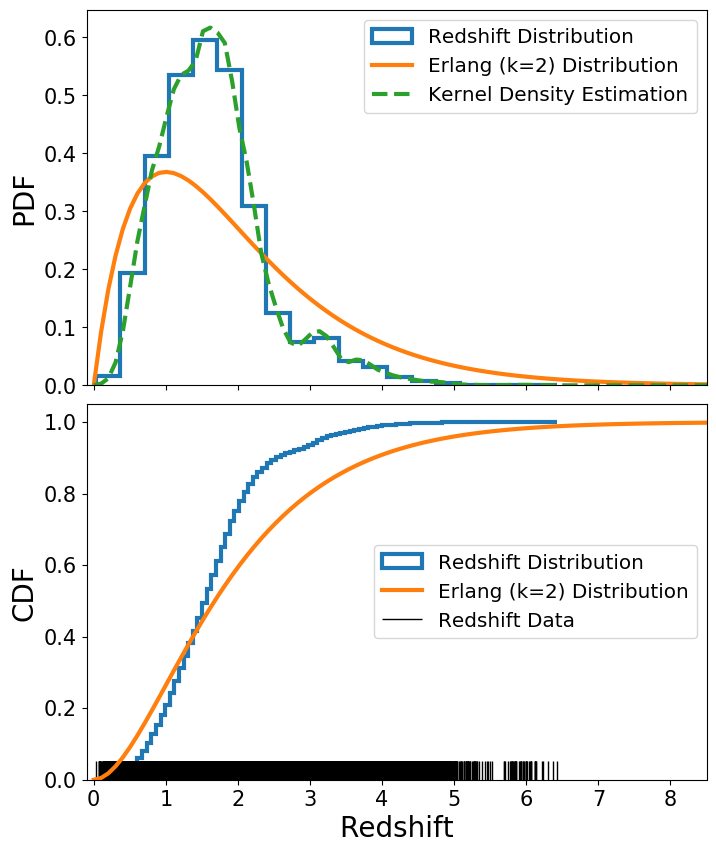

In [73]:
bad_data_seq = []
for i in range(number):
    if (position_flag[i]=='null' or redshift_flag[i]!='null' or redshift_agn[i]=='null'):
        bad_data_seq.extend([i])
print('bad_data_num = ', len(bad_data_seq))

name_good = np.delete(name,bad_data_seq)
ra_good = np.delete(ra_raw,bad_data_seq)
dec_good = np.delete(dec_raw,bad_data_seq)
redshift_agn_good = np.delete(redshift_agn,bad_data_seq).astype(np.float)
object_type_good = np.delete(object_type,bad_data_seq)
broad_type_good = np.delete(broad_type,bad_data_seq)
good_number = len(name_good)
print('good_source_number = ',good_number,number-len(bad_data_seq))
redshift_qso = redshift_agn_good[object_type_good=='Q']
print(len(redshift_qso))

redshift_agn_good = redshift_qso

# https://stackoverflow.com/questions/39728723/vertical-line-at-the-end-of-a-cdf-histogram-using-matplotlib
def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])
        
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import seaborn as sns
#sns.set(style="whitegrid")
%matplotlib inline
mpl.style.use('default')


fig, axes = plt.subplots(2, 1, figsize=(8, 10),
                         sharex=True, gridspec_kw={'hspace': 0.05})

axes[0].hist(redshift_agn_good, density=True,histtype='step',linewidth=3.0,
            bins=19, label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).pdf(x)
axes[0].plot(x, Y, linestyle="-", linewidth=3.0,
             #color="navy",
             label="Erlang (k=2) Distribution")
kde = stats.kde.gaussian_kde(redshift_agn_good)
axes[0].plot(x, kde(x), linestyle="--",
             linewidth=3.0, label="Kernel Density Estimation")
axes[0].set_xlim([-0.1,8.5])
axes[0].tick_params(labelsize=15)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend([handles[2],handles[0],handles[1]],
               [labels[2],labels[0],labels[1]],fontsize='x-large')
axes[0].set_ylabel('PDF',fontsize=20)


axes[1].hist(redshift_agn_good, cumulative=True,histtype='step',linewidth=3.0,
             rwidth=5.0, density=True, bins=100,
            label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).cdf(x)
axes[1].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Erlang (k=2) Distribution")

sns.distplot(redshift_agn_good,kde=False,hist=False,rug=True,ax=axes[1],rug_kws=dict(label='Redshift Data'),color='black')
axes[1].tick_params(labelsize=15)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend([handles[1],handles[0],handles[2]],
              [labels[1],labels[0],labels[2]],fontsize='x-large',loc="right")

axes[1].set_ylabel('CDF',fontsize=20)
axes[1].set_xlabel('Redshift',fontsize=20)
fix_hist_step_vertical_line_at_end(axes[1])

# compare with norm

(0, 8.5)

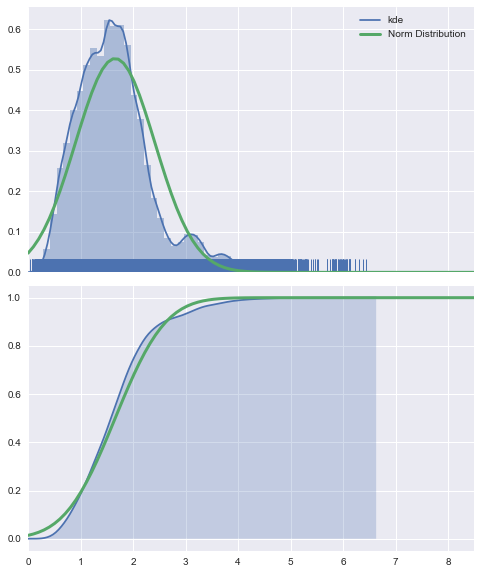

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import seaborn as sns
%matplotlib inline
mpl.style.use('seaborn')

loc, scale = stats.norm.fit(redshift_agn_good)


fig, axes = plt.subplots(2, 1, figsize=(8, 10),
                         sharex=True, gridspec_kw={'hspace': 0.05})

sns.distplot(redshift_agn_good,rug=True,ax=axes[0],kde_kws=dict(label='kde'))
x = np.linspace(0.0,10.0,100)
Y = stats.norm(loc,scale).pdf(x)
axes[0].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Norm Distribution")
axes[0].set_xlim([0,8.5])
axes[0].legend()

sns.kdeplot(redshift_agn_good,shade=True,legend=True,cumulative=True,ax=axes[1])
x = np.linspace(0.0,10.0,100)
Y = stats.norm(loc,scale).cdf(x)
axes[1].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Norm Distribution")
axes[1].set_xlim([0,8.5])

In [101]:
stats.kstest(redshift_agn_good,stats.norm(loc,scale).cdf)

KstestResult(statistic=0.07287375748063818, pvalue=0.0)

In [141]:
stats.ks_2samp(redshift_agn_good,stats.norm.rvs(loc,scale,size=100))

Ks_2sampResult(statistic=0.08322956921690891, pvalue=0.4931129230917411)

# compare with gamma

Note that typically, the loc parameter of the gamma distribution is not used (i.e. the PDF should not be shifted), and the value is fixed at 0. By default, the fit method treats loc as fitting parameter, so you might get a small nonzero shift--check the parameters returned by fit. You can tell fit to not include loc as a fitting parameter by using the argument floc=0

example:

param = gamma.fit(y, floc=0)


x = np.linspace(0, y.max(), 100)

pdf_fitted = gamma.pdf(x, *param)

(0, 8.5)

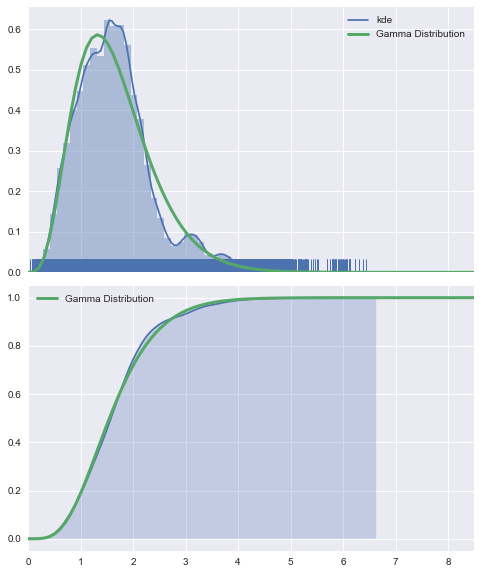

In [164]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import seaborn as sns
%matplotlib inline
mpl.style.use('seaborn')

a, b, c = stats.gamma.fit(redshift_agn_good,floc=0,scale=1.0)


fig, axes = plt.subplots(2, 1, figsize=(8, 10),
                         sharex=True, gridspec_kw={'hspace': 0.05})

sns.distplot(redshift_agn_good,rug=True,ax=axes[0],kde_kws=dict(label='kde'))
x = np.linspace(0.0,10.0,100)
Y = stats.gamma.pdf(x, a,b,c)
axes[0].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Gamma Distribution")
axes[0].set_xlim([0,8.5])
axes[0].legend()

sns.kdeplot(redshift_agn_good,shade=True,legend=True,cumulative=True,ax=axes[1])
x = np.linspace(0.0,10.0,100)
Y = stats.gamma.cdf(x,a,b,c)
axes[1].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Gamma Distribution")
axes[1].legend()
axes[1].set_xlim([0,8.5])

In [165]:
a,b,c

(4.9500968507776815, 0, 0.3350485132366581)

In [167]:
stats.ks_2samp(redshift_agn_good,stats.gamma.rvs(a,b,c,size=100))

Ks_2sampResult(statistic=0.08451267218283981, pvalue=0.47326365968841033)

# re-select sample for BLLAC

bad_data_num =  5590
good_source_number =  163351 163351
669


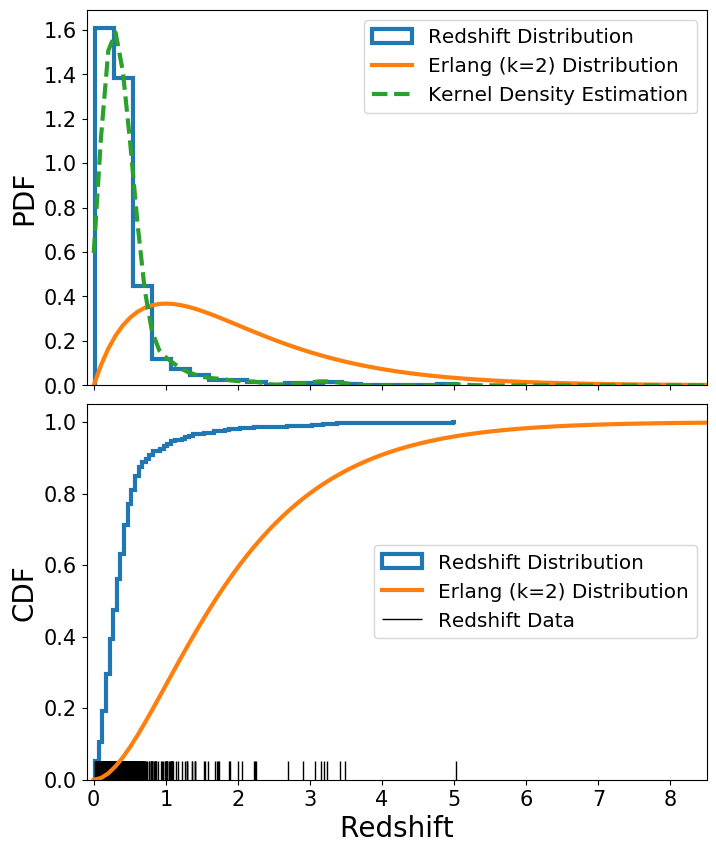

In [40]:
bad_data_seq = []
for i in range(number):
    if (position_flag[i]=='null' or redshift_flag[i]!='null' or redshift_agn[i]=='null'):
        bad_data_seq.extend([i])
print('bad_data_num = ', len(bad_data_seq))

name_good = np.delete(name,bad_data_seq)
ra_good = np.delete(ra_raw,bad_data_seq)
dec_good = np.delete(dec_raw,bad_data_seq)
redshift_agn_good = np.delete(redshift_agn,bad_data_seq).astype(np.float)
object_type_good = np.delete(object_type,bad_data_seq)
broad_type_good = np.delete(broad_type,bad_data_seq)
good_number = len(name_good)
print('good_source_number = ',good_number,number-len(bad_data_seq))
redshift_qso = redshift_agn_good [broad_type_good=='BLLAC']
print(len(redshift_qso))

redshift_agn_good = redshift_qso

# https://stackoverflow.com/questions/39728723/vertical-line-at-the-end-of-a-cdf-histogram-using-matplotlib
def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])
        
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import seaborn as sns
#sns.set(style="whitegrid")
%matplotlib inline
mpl.style.use('default')


fig, axes = plt.subplots(2, 1, figsize=(8, 10),
                         sharex=True, gridspec_kw={'hspace': 0.05})

axes[0].hist(redshift_agn_good, density=True,histtype='step',linewidth=3.0,
            bins=19, label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).pdf(x)
axes[0].plot(x, Y, linestyle="-", linewidth=3.0,
             #color="navy",
             label="Erlang (k=2) Distribution")
kde = stats.kde.gaussian_kde(redshift_agn_good)
axes[0].plot(x, kde(x), linestyle="--",
             linewidth=3.0, label="Kernel Density Estimation")
axes[0].set_xlim([-0.1,8.5])
axes[0].tick_params(labelsize=15)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend([handles[2],handles[0],handles[1]],
               [labels[2],labels[0],labels[1]],fontsize='x-large')
axes[0].set_ylabel('PDF',fontsize=20)


axes[1].hist(redshift_agn_good, cumulative=True,histtype='step',linewidth=3.0,
             rwidth=5.0, density=True, bins=100,
            label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).cdf(x)
axes[1].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Erlang (k=2) Distribution")

sns.distplot(redshift_agn_good,kde=False,hist=False,rug=True,ax=axes[1],rug_kws=dict(label='Redshift Data'),color='black')
axes[1].tick_params(labelsize=15)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend([handles[1],handles[0],handles[2]],
              [labels[1],labels[0],labels[2]],fontsize='x-large',loc="right")

#fig.text(-0.03, 0.7, 'PDF', ha='center',
#            va='center',rotation='vertical',fontsize=20)
#fig.text(-0.03, 0.3, 'CDF', ha='center',
#            va='center',rotation='vertical',fontsize=20)
#fig.text(0.5, 0.07, "$z$", ha='center',va='center',fontsize=20)
axes[1].set_ylabel('CDF',fontsize=20)
axes[1].set_xlabel('Redshift',fontsize=20)
fix_hist_step_vertical_line_at_end(axes[1])
#plt.xlabel('redshift $z$',fontsize=20)
#plt.savefig('./redshift_AGN.eps')
#plt.close()

163351 163351


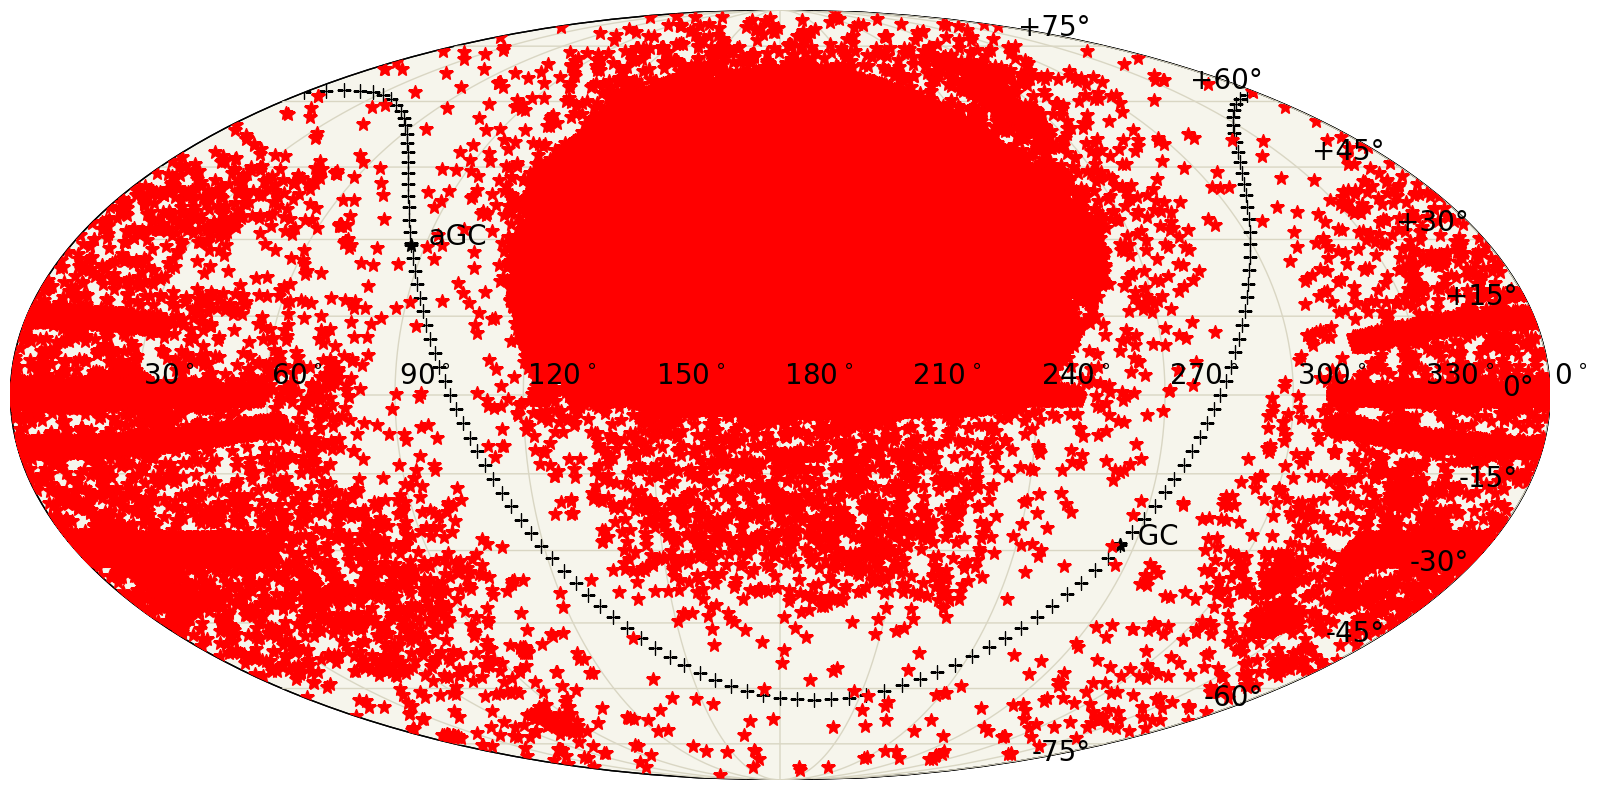

In [48]:
#################################
# Celestial Coordinate (ra,dec) #
#################################
projection = 'moll'
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
map = Basemap(projection=projection,lat_0=0,lon_0=180,
              resolution='l',area_thresh=1000.0,celestial=True,ax=ax)
map.drawmeridians(np.arange(0, 360, 30), dashes=[1,0],color='#d9d6c3')
map.drawparallels(np.arange(-90, 90, 15), dashes=[1,0],labels=[1,0,0,1],
                  color='#d9d6c3',size=20)
map.drawmapboundary(fill_color='#f6f5ec')
if projection == 'moll':
    az1 = np.arange(0, 360, 30)
    zen1 = np.zeros(az1.size) + 2
    azname = []
    for i in az1:
        azname.append(r'${\/%s\/^{\circ}}$' % str(i))
    x1, y1 = map(az1, zen1)
    for index, value in enumerate(az1):
        plt.text(x1[index], y1[index], azname[index], size=20)

galactic_center=SkyCoord("0h 0d", frame='galactic').transform_to('icrs')
x,y=map(galactic_center.ra.deg, galactic_center.dec.deg)
map.plot(x, y, '*', color='k', markersize=10)
plt.text(x, y, '  GC', fontsize=20)

anti_galactic_center=SkyCoord("12h 0d", frame='galactic').transform_to('icrs')
x,y=map(anti_galactic_center.ra.deg, anti_galactic_center.dec.deg)
map.plot(x, y, '*', color='k', markersize=10)
plt.text(x, y, '  aGC', fontsize=20)

for i in np.arange(0, 24, 0.2):
    galactic_plane=SkyCoord(str(i)+"h 0d", frame='galactic').transform_to('icrs')
    x,y=map(galactic_plane.ra.deg, galactic_plane.dec.deg)
    map.plot(x, y, '+', color='k', markersize=10)

catalog_x=[]
catalog_y=[]
#sourceNumber
for i in range(good_number):
    print(f"i={i}",end="\r")
    result = ra_good[i].split(' ')
    ra = "{}h{}m{}s".format(result[0],result[1],result[2])
    result = dec_good[i].split(' ')
    dec = "{}d{}m{}s".format(result[0],result[1],result[2])
    mysource = SkyCoord(ra, dec, frame = 'icrs')
    x, y = map(mysource.ra.deg,mysource.dec.deg)
    catalog_x.extend([x])
    catalog_y.extend([y])
print(len(catalog_x),len(catalog_y))
map.plot(catalog_x, catalog_y, color='r',marker='*',markersize=10,ls='None')

# MgII and DLA (data from Yinan)

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits

hduMgII = fits.open('./qso_mgii.fits')
zQSO = hduMgII[1].data.field(5)

hduDLA = fits.open('./dla_catalog.fit')
zDLA = hduDLA[1].data.field(5)

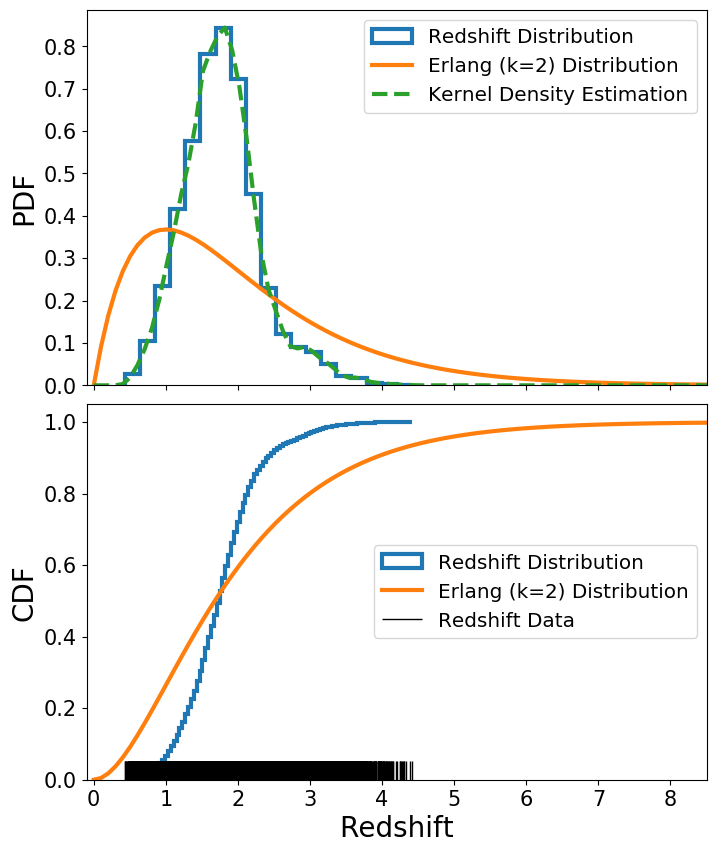

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import seaborn as sns
#sns.set(style="whitegrid")
%matplotlib inline
mpl.style.use('default')


fig, axes = plt.subplots(2, 1, figsize=(8, 10),
                         sharex=True, gridspec_kw={'hspace': 0.05})

axes[0].hist(zQSO, density=True,histtype='step',linewidth=3.0,
            bins=19, label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).pdf(x)
axes[0].plot(x, Y, linestyle="-", linewidth=3.0,
             #color="navy",
             label="Erlang (k=2) Distribution")
kde = stats.kde.gaussian_kde(zQSO)
axes[0].plot(x, kde(x), linestyle="--",
             linewidth=3.0, label="Kernel Density Estimation")
axes[0].set_xlim([-0.1,8.5])
axes[0].tick_params(labelsize=15)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend([handles[2],handles[0],handles[1]],
               [labels[2],labels[0],labels[1]],fontsize='x-large')
axes[0].set_ylabel('PDF',fontsize=20)


axes[1].hist(zQSO, cumulative=True,histtype='step',linewidth=3.0,
             rwidth=5.0, density=True, bins=100,
            label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).cdf(x)
axes[1].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Erlang (k=2) Distribution")

sns.distplot(zQSO,kde=False,hist=False,rug=True,ax=axes[1],rug_kws=dict(label='Redshift Data'),color='black')
axes[1].tick_params(labelsize=15)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend([handles[1],handles[0],handles[2]],
              [labels[1],labels[0],labels[2]],fontsize='x-large',loc="right")

axes[1].set_ylabel('CDF',fontsize=20)
axes[1].set_xlabel('Redshift',fontsize=20)
fix_hist_step_vertical_line_at_end(axes[1])

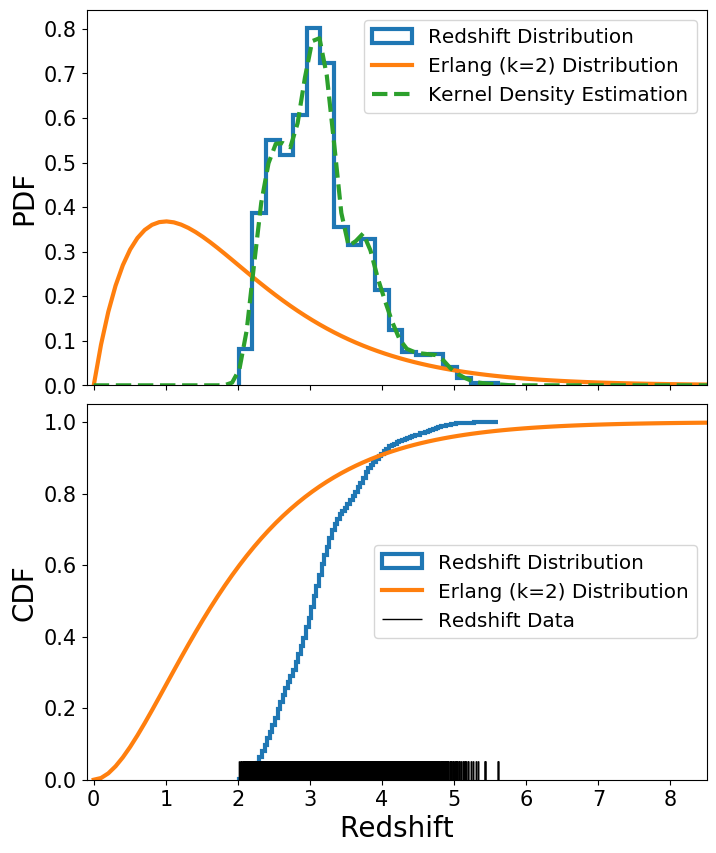

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import seaborn as sns
#sns.set(style="whitegrid")
%matplotlib inline
mpl.style.use('default')


fig, axes = plt.subplots(2, 1, figsize=(8, 10),
                         sharex=True, gridspec_kw={'hspace': 0.05})

axes[0].hist(zDLA, density=True,histtype='step',linewidth=3.0,
            bins=19, label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).pdf(x)
axes[0].plot(x, Y, linestyle="-", linewidth=3.0,
             #color="navy",
             label="Erlang (k=2) Distribution")
kde = stats.kde.gaussian_kde(zDLA)
axes[0].plot(x, kde(x), linestyle="--",
             linewidth=3.0, label="Kernel Density Estimation")
axes[0].set_xlim([-0.1,8.5])
axes[0].tick_params(labelsize=15)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend([handles[2],handles[0],handles[1]],
               [labels[2],labels[0],labels[1]],fontsize='x-large')
axes[0].set_ylabel('PDF',fontsize=20)


axes[1].hist(zDLA, cumulative=True,histtype='step',linewidth=3.0,
             rwidth=5.0, density=True, bins=100,
            label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).cdf(x)
axes[1].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Erlang (k=2) Distribution")

sns.distplot(zDLA,kde=False,hist=False,rug=True,ax=axes[1],rug_kws=dict(label='Redshift Data'),color='black')
axes[1].tick_params(labelsize=15)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend([handles[1],handles[0],handles[2]],
              [labels[1],labels[0],labels[2]],fontsize='x-large',loc="right")

axes[1].set_ylabel('CDF',fontsize=20)
axes[1].set_xlabel('Redshift',fontsize=20)
fix_hist_step_vertical_line_at_end(axes[1])